## Data cleaning

In [42]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

steps = pd.read_csv('steps.csv', sep=';')
steps.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
survey = pd.read_csv('survey.csv')
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [44]:
df = pd.merge(steps, survey, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [45]:
df['weight'].value_counts() 
df['weight'].sort_values() 

389      6.0
840     20.0
102     37.0
633     45.0
117     45.0
198     45.0
630     45.0
67      45.0
70      45.0
122     45.0
268     45.0
387     45.0
755     46.0
181     46.0
585     46.0
874     47.0
885     47.0
376     47.0
170     47.0
32      47.0
676     48.0
118     48.0
717     48.0
908     48.0
246     49.0
442     49.0
183     49.0
490     49.0
313     49.0
150     50.0
       ...  
332     98.0
320     99.0
394    100.0
806    101.0
457    102.0
131    105.0
155    106.0
365    106.0
609    106.0
290    110.0
272    110.0
683    115.0
581    116.0
52     120.0
647    120.0
670    128.0
486    133.0
789    133.0
61     133.0
25     140.0
390    140.0
890    140.0
323    140.0
583    140.0
257    149.0
549    155.0
820    155.0
43     700.0
841      NaN
923      NaN
Name: weight, Length: 929, dtype: float64

In [46]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def above_180(x):
    if(x > 180): 
        return float('NaN')
    else: 
        return x
    
def below_30(x):
    if(x < 30): 
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(above_180)
df['weight'] = df['weight'].apply(below_30)



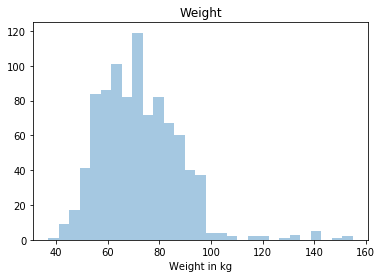

In [47]:
sns.distplot(df['weight'].dropna(), kde=False)
plt.title('Weight')
plt.xlabel('Weight in kg')
plt.show()